# CIA 1

> Bivas Kumar 2347111

## 1

In [1]:
import numpy as np

# Inputs for XOR gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Outputs for XOR gate
y = np.array([0, 1, 1, 0])

In [22]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Create a Perceptron model (Single Layer)
perceptron = Perceptron()

# Train the Perceptron model on the XOR dataset
perceptron.fit(X, y)

# Predict using the trained Perceptron model
y_pred_single_layer = perceptron.predict(X)

# Display the predictions
print("Single Layer Perceptron Predictions:", y_pred_single_layer)

# Calculate the accuracy
accuracy_single_layer = accuracy_score(y, y_pred_single_layer)
print(f"Single Layer Perceptron Accuracy: {accuracy_single_layer * 100:.2f}%")

Single Layer Perceptron Predictions: [0 0 0 0]
Single Layer Perceptron Accuracy: 50.00%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> **Observation**

- The accuracy of the Single Layer Perceptron (SLP) is low ~$50\%$ because it cannot classify the $XOR$ problem properly due to the non-linearly separable nature of $XOR$.
- A SLP fails to capture the mutual exclusive nature of inputs (for output, $1$) using only $1$ activation function.

In [25]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function (for backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)

# Seed for reproducibility
np.random.seed(111)

# Number of inputs, hidden neurons, and outputs
input_layer_neurons = 2   # XOR has 2 inputs
hidden_layer_neurons = 2  # 2 neurons in the hidden layer
output_neurons = 1        # XOR has 1 output

# Initialize weights and biases
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

print("Initial weights (input -> hidden):\n", weights_input_hidden)
print("Initial weights (hidden -> output):\n", weights_hidden_output)

# Define learning rate and number of iterations
learning_rate = 0.1
epochs = 10000

# Training the neural network
for epoch in range(epochs):

    # Forward Propagation
    # Input -> Hidden
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_activation = sigmoid(hidden_layer_input)

    # Hidden -> Output
    output_layer_input = np.dot(hidden_layer_activation, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    # Error at output
    error_output = y - predicted_output
    d_predicted_output = error_output * sigmoid_derivative(predicted_output)

    # Error at hidden layer
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_activation)

    # Update weights and biases
    weights_hidden_output += hidden_layer_activation.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Optional: Print error every 1000 epochs to observe convergence
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Error: {np.mean(np.abs(error_output))}")

# After training, print final output
print("Final predicted output after training:\n", predicted_output)


Initial weights (input -> hidden):
 [[0.61217018 0.16906975]
 [0.43605902 0.76926247]]
Initial weights (hidden -> output):
 [[0.2953253 ]
 [0.14916296]]
Epoch 0, Error: 0.4995960955247929
Epoch 1000, Error: 0.499576470011457
Epoch 2000, Error: 0.4971980202065689
Epoch 3000, Error: 0.4729817660207706
Epoch 4000, Error: 0.400552548799779
Epoch 5000, Error: 0.33909586356415977
Epoch 6000, Error: 0.17858893774969095
Epoch 7000, Error: 0.11296738341071344
Epoch 8000, Error: 0.08610672553231848
Epoch 9000, Error: 0.07140620119922343
Final predicted output after training:
 [[0.06376846]
 [0.94070391]
 [0.94013505]
 [0.06501998]]


> **Observation**

- This has ~$1$ as output for the correct inputs

## 2A

### Load & Process

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle

# Load the dataset
file_path = "/content/Tweets.csv"
data = pd.read_csv(file_path, on_bad_lines='skip')

# Filter only relevant columns: 'text' and 'airline_sentiment'
df = data[['text', 'airline_sentiment']]

# Drop rows with missing values
df.dropna(subset=['text', 'airline_sentiment'], inplace=True)

# Remove neutral sentiments (if you want to simplify to binary classification)
df = df[df['airline_sentiment'] != 'neutral']

# Convert 'airline_sentiment' to binary (1 for positive, 0 for negative)
df['sentiment'] = df['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Shuffle the data to ensure randomness
df = shuffle(df, random_state=42)

# Split into features (X) and labels (y)
X = df['text'].values
y = df['sentiment'].values

# Vectorize text data into numerical format using CountVectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(X).toarray()

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

<ipython-input-1-b90de472173c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['text', 'airline_sentiment'], inplace=True)


Training data shape: (9232, 1000)
Test data shape: (2309, 1000)


In [2]:
import numpy as np

# Define the Neural Network Class
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid'):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

        # Choose activation function
        if activation == 'sigmoid':
            self.activation = self.sigmoid
            self.activation_derivative = self.sigmoid_derivative
        elif activation == 'relu':
            self.activation = self.relu
            self.activation_derivative = self.relu_derivative
        elif activation == 'tanh':
            self.activation = self.tanh
            self.activation_derivative = self.tanh_derivative

    # Activation functions
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, a):
        return a * (1 - a)

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, a):
        return np.where(a <= 0, 0, 1)

    def tanh(self, z):
        return np.tanh(z)

    def tanh_derivative(self, a):
        return 1 - np.power(a, 2)

    # Forward pass
    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.activation(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)  # Output activation (sigmoid for binary classification)
        return self.A2

    # Backward pass (Gradient Descent)
    def backward(self, X, y, output, learning_rate=0.01):
        m = X.shape[0]  # Number of samples

        # Calculate output layer error
        dZ2 = output - y.reshape(-1, 1)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        # Backpropagate through hidden layer
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.activation_derivative(self.A1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights and biases
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    # Training function
    def train(self, X, y, epochs=1000, learning_rate=0.01):
        losses = []
        for epoch in range(epochs):
            # Forward propagation
            output = self.forward(X)

            # Calculate loss (Binary Cross-Entropy)
            loss = -(1 / len(y)) * np.sum(y * np.log(output) + (1 - y) * np.log(1 - output))
            losses.append(loss)

            # Backward propagation and weight update
            self.backward(X, y, output, learning_rate)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

        return losses

    # Prediction function
    def predict(self, X):
        probabilities = self.forward(X)
        return [1 if p >= 0.5 else 0 for p in probabilities]

    # Accuracy calculation
    def accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy


In [4]:
# Instantiate the model
input_size = X_train.shape[1]  # Number of features
hidden_size = 10  # Number of neurons in the hidden layer
output_size = 1   # Binary classification (positive/negative)

nn_sigmoid = SimpleNN(input_size, hidden_size, output_size, activation='sigmoid')
nn_relu = SimpleNN(input_size, hidden_size, output_size, activation='relu')
nn_tanh = SimpleNN(input_size, hidden_size, output_size, activation='tanh')

# Train the models
loss_sigmoid = nn_sigmoid.train(X_train, y_train, epochs=50, learning_rate=0.01)
loss_relu = nn_relu.train(X_train, y_train, epochs=50, learning_rate=0.01)
loss_tanh = nn_tanh.train(X_train, y_train, epochs=50, learning_rate=0.01)

# Evaluate models on the test set
accuracy_sigmoid = nn_sigmoid.accuracy(X_test, y_test)
accuracy_relu = nn_relu.accuracy(X_test, y_test)
accuracy_tanh = nn_tanh.accuracy(X_test, y_test)

print(f"Sigmoid Activation Test Accuracy: {accuracy_sigmoid}")
print(f"ReLU Activation Test Accuracy: {accuracy_relu}")
print(f"Tanh Activation Test Accuracy: {accuracy_tanh}")


Epoch 0, Loss: 6401.572957891262
Epoch 0, Loss: 6399.278753882174
Epoch 0, Loss: 6399.908279117619
Sigmoid Activation Test Accuracy: 0.8029449978345604
ReLU Activation Test Accuracy: 0.8029449978345604
Tanh Activation Test Accuracy: 0.8029449978345604


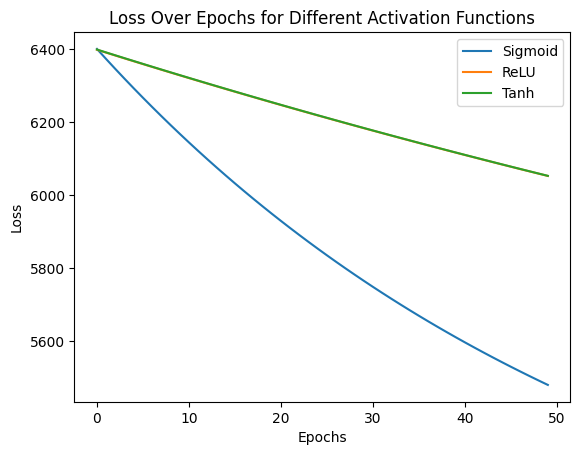

In [5]:
import matplotlib.pyplot as plt

# Plot loss over epochs for different activations
plt.plot(loss_sigmoid, label='Sigmoid')
plt.plot(loss_relu, label='ReLU')
plt.plot(loss_tanh, label='Tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs for Different Activation Functions')
plt.legend()
plt.show()


### Key Concepts in Sentiment Analysis Using Neural Networks

1. **Sentiment Classification**:
   - The task of categorizing text data (e.g., tweets) into sentiment classes (e.g., positive or negative).
   - This is typically a binary classification problem.

2. **Neural Networks**:
   - A computational model inspired by the human brain, consisting of layers of interconnected nodes (neurons) that process input data.
   - The architecture typically includes:
     - **Input Layer**: Receives the input features (e.g., vectorized text).
     - **Hidden Layers**: Intermediate layers that learn complex patterns in the data.
     - **Output Layer**: Produces the final prediction (e.g., sentiment class).

3. **Activation Functions**:
   - Functions applied to the output of neurons to introduce non-linearity into the model. Common activation functions include:
   - **Sigmoid**:
     $$
     \sigma(z) = \frac{1}{1 + e^{-z}}
     $$
     - Outputs values between $0$ and $1$, often used in binary classification tasks.
   - **ReLU (Rectified Linear Unit)**:
     $$
     \text{ReLU}(z) = \max(0, z)
     $$
     - Allows positive values to pass through while blocking negative values, helping to mitigate the vanishing gradient problem.
   - **Tanh**:
     $$
     \tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
     $$
     - Outputs values between $-1$ and $1$, providing a zero-centered output.

4. **Backpropagation**:
   - A training algorithm that optimizes the weights of the neural network by minimizing the error.
   - It involves:
    - **Forward Pass**: Calculating the output of the network given an input.
    - **Loss Calculation**: Determining the difference between the predicted output and the true label using a loss function (e.g., Binary Cross-Entropy).
    - **Backward Pass**: Calculating gradients of the loss with respect to each weight using the chain rule, allowing for weight updates to minimize loss.

5. **Loss Function**:
   - A measure of how well the model's predictions match the actual labels.
   -  For binary classification, the Binary Cross-Entropy loss is commonly used:
   $$
   \text{Loss} = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
   $$
   where $y_i$ is the true label, $\hat{y}_i$ is the predicted probability, and $m$ is the number of samples.

6. **Model Evaluation**:
   - Assessing the performance of the trained model using metrics such as accuracy, precision, and recall. Accuracy is calculated as:
   $$
   \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Predictions}}
   $$